# **Automatidata project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

The data consulting firm Automatidata has recently hired you as the newest member of their data analytics team. Their newest client, the NYC Taxi and Limousine Commission (New York City TLC), wants the Automatidata team to build a multiple linear regression model to predict taxi fares using existing data that was collected over the course of a year. The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and A/B testing.

The Automatidata team has reviewed the results of the A/B testing. Now it’s time to work on predicting the taxi fare amounts. You’ve impressed your Automatidata colleagues with your hard work and attention to detail. The data team believes that you are ready to build the regression model and update the client New York City TLC about your progress.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# Course 5 End-of-course project: Build a multiple linear regression model

In this activity, you will build a multiple linear regression model. As you've learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed. 

Completing this activity will help you practice planning out and buidling a multiple linear regression model based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.
<br/>

**The purpose** of this project is to demostrate knowledge of EDA and a multiple linear regression model

**The goal** is to build a multiple linear regression model and evaluate the model
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a multiple linear regression model?

**Part 2:** Model Building and evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

# Build a multiple linear regression model

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: **Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.


### Task 1. Imports and loading
Import the packages that you've learned are needed for building linear regression models.

In [164]:
# Imports
# Packages for numerics + dataframes
import numpy as np
import pandas as pd

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions for calculating trip durations
import datetime as dt

# Packages for OLS, MLR, confusion matrix
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler

**Note:** `Pandas` is used to load the NYC TLC dataset. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [3]:
# Load dataset into dataframe 
df0=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv") 

<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: **Analyze**

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a multiple linear regression model?


==> ENTER YOUR RESPONSE HERE 

### Task 2a. Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

Start with `.shape` and `.info()`.

In [4]:
# Start with `.shape` and `.info()`
print(df0.shape)
print('\n')
print(df0.info())



(22699, 18)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  f

Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [5]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()
print(df0.isna().sum())
print('\n')

print(df0.drop_duplicates().shape)

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64


(22699, 18)


Use `.describe()`.

In [6]:
# Use .describe()

df0.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


### Task 2b. Convert pickup & dropoff columns to datetime


In [7]:
# Check the format of the data

print(df0['tpep_pickup_datetime'].dtype)
print(df0['tpep_dropoff_datetime'].dtype)

object
object


In [8]:
# Convert datetime columns to datetime

df0['tpep_pickup_datetime'] = pd.to_datetime(df0['tpep_pickup_datetime'])
df0['tpep_dropoff_datetime'] = pd.to_datetime(df0['tpep_dropoff_datetime'])

print(df0['tpep_pickup_datetime'].dtype)
print(df0['tpep_dropoff_datetime'].dtype)

datetime64[ns]
datetime64[ns]


### Task 2c. Create duration column

Create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [9]:
# Create `duration` column

df0.insert(4,"duration",df0['tpep_dropoff_datetime'] - df0['tpep_pickup_datetime'])

df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,duration,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,0 days 00:14:04,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,0 days 00:26:30,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,0 days 00:07:12,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,0 days 00:30:15,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,0 days 00:16:43,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [10]:
df0['duration'] = df0['tpep_dropoff_datetime'] - df0['tpep_pickup_datetime']

df0['duration'] = pd.to_timedelta(df0['duration'])

df0['duration'] = df0['duration'].dt.total_seconds() / 60

df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,duration,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,14.066667,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,26.500000,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,7.200000,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,30.250000,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,16.716667,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


### Outliers

Call `df.info()` to inspect the columns and decide which ones to check for outliers.

In [11]:
df0.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   duration               22699 non-null  float64       
 5   passenger_count        22699 non-null  int64         
 6   trip_distance          22699 non-null  float64       
 7   RatecodeID             22699 non-null  int64         
 8   store_and_fwd_flag     22699 non-null  object        
 9   PULocationID           22699 non-null  int64         
 10  DOLocationID           22699 non-null  int64         
 11  payment_type           22699 non-null  int64         
 12  fare_amount            22699 non-null  float64       
 13  e

Keeping in mind that many of the features will not be used to fit your model, the most important columns to check for outliers are likely to be:
* `trip_distance`
* `fare_amount`
* `duration`



### Task 2d. Box plots

Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

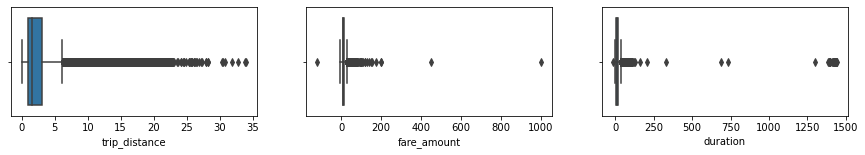

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(15, 2))
sns.boxplot(x=df0['trip_distance'],ax=axes[0])
sns.boxplot(x=df0['fare_amount'],ax=axes[1])
sns.boxplot(x=df0['duration'],ax=axes[2])
plt.show();

**Questions:** 
1. Which variable(s) contains outliers? 

2. Are the values in the `trip_distance` column unbelievable?

3. What about the lower end? Do distances, fares, and durations of 0 (or negative values) make sense?

All 3 variables contain outliers. trip_distance has values of 0, which doesn't make sense. Also, both fare_amount and duration have extreme outliers on the high side which aren't very believable. fare_amount also has a negative value listed, which doesn't seem to make sense.

### Task 2e. Imputations

#### `trip_distance` outliers

You know from the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?

To check, sort the column values, eliminate duplicates, and inspect the least 10 values. Are they rounded values or precise values?

In [13]:
# Are trip distances of 0 bad data or very short trips rounded down?

sorted(set(df0['trip_distance']))[:10]

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]

The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Calculate the count of rides where the `trip_distance` is zero.

In [14]:
sum(df0['trip_distance'] == 0)

148

#### `fare_amount` outliers

In [15]:
df0['fare_amount'].describe()


count    22699.000000
mean        13.026629
std         13.243791
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

**Question:** What do you notice about the values in the `fare_amount` column?

Impute values less than $0 with `0`.

In [16]:
# Impute values less than $0 with 0

df0.loc[df0['fare_amount'] < 0, 'fare_amount'] = 0
df0['fare_amount'].min()

0.0

Now impute the maximum value as `Q3 + (6 * IQR)`.

In [17]:
def outlier_imputer(column_list, iqr_factor):
    '''
    Impute upper-limit values in specified columns based on their interquartile range.

    Arguments:
        column_list: A list of columns to iterate over
        iqr_factor: A number representing x in the formula:
                    Q3 + (x * IQR). Used to determine maximum threshold,
                    beyond which a point is considered an outlier.

    The IQR is computed for each column in column_list and values exceeding
    the upper threshold for each column are imputed with the upper threshold value.
    '''
    for col in column_list:
        # Reassign minimum to zero
        df0.loc[df0[col] < 0, col] = 0

        # Calculate upper threshold
        q1 = df0[col].quantile(0.25)
        q3 = df0[col].quantile(0.75)
        iqr = q3 - q1
        upper_threshold = q3 + (iqr_factor * iqr)
        print(col)
        print('q3:', q3)
        print('upper_threshold:', upper_threshold)

        # Reassign values > threshold to threshold
        df0.loc[df0[col] > upper_threshold, col] = upper_threshold
        print(df0[col].describe())
        print()

In [18]:
outlier_imputer(['fare_amount'],6)

fare_amount
q3: 14.5
upper_threshold: 62.5
count    22699.000000
mean        12.897913
std         10.541137
min          0.000000
25%          6.500000
50%          9.500000
75%         14.500000
max         62.500000
Name: fare_amount, dtype: float64



#### `duration` outliers


In [19]:
# Call .describe() for duration outliers
df0['duration'].describe()

count    22699.000000
mean        17.013777
std         61.996482
min        -16.983333
25%          6.650000
50%         11.183333
75%         18.383333
max       1439.550000
Name: duration, dtype: float64

The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

In [20]:
# Impute a 0 for any negative values
df0.loc[df0['duration'] < 0, 'duration'] = 0
df0['duration'].min()

0.0

In [21]:
# Impute the high outliers
outlier_imputer(['duration'],6)

duration
q3: 18.383333333333333
upper_threshold: 88.78333333333333
count    22699.000000
mean        14.460555
std         11.947043
min          0.000000
25%          6.650000
50%         11.183333
75%         18.383333
max         88.783333
Name: duration, dtype: float64



### Task 3a. Feature engineering

#### Create `mean_distance` column

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you *do* know to generalize about ones you do not know.

In this step, create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

For example, if your data were:

|Trip|Start|End|Distance|
|--: |:---:|:-:|    |
| 1  | A   | B | 1  |
| 2  | C   | D | 2  |
| 3  | A   | B |1.5 |
| 4  | D   | C | 3  |

The results should be:
```
A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles
```

Notice that C -> D is not the same as D -> C. All trips that share a unique pair of start and end points get grouped and averaged.

Then, a new column `mean_distance` will be added where the value at each row is the average for all trips with those pickup and dropoff locations:

|Trip|Start|End|Distance|mean_distance|
|--: |:---:|:-:|  :--   |:--   |
| 1  | A   | B | 1      | 1.25 |
| 2  | C   | D | 2      | 2    |
| 3  | A   | B |1.5     | 1.25 |
| 4  | D   | C | 3      | 3    |


Begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row.

One way to do this is to convert the pickup and dropoff location IDs to strings and join them, separated by a space. The space is to ensure that, for example, a trip with pickup/dropoff points of 12 & 151 gets encoded differently than a trip with points 121 & 51.

So, the new column would look like this:

|Trip|Start|End|pickup_dropoff|
|--: |:---:|:-:|  :--         |
| 1  | A   | B | 'A B'        |
| 2  | C   | D | 'C D'        |
| 3  | A   | B | 'A B'        |
| 4  | D   | C | 'D C'        |


In [22]:
# Create `pickup_dropoff` column

df0['PULocationID'] = df0['PULocationID'].astype('str')
df0['DOLocationID'] = df0['DOLocationID'].astype('str')

df0['pickup_dropoff'] = df0['PULocationID'] + ' ' + df0['DOLocationID']
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,duration,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_dropoff
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,14.066667,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,100 231
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,26.500000,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,186 43
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,7.200000,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,262 236
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,30.250000,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,188 97
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,16.716667,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,4 112


Now, use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. Assign the results to a variable named `grouped`.

In [23]:
grouped = df0.groupby(['pickup_dropoff']).mean()[['trip_distance']]
grouped

,trip_distance
pickup_dropoff,
1 1,2.433333
10 148,15.700000
100 1,16.890000
100 100,0.253333
100 107,1.180000
...,...
97 65,0.500000
97 66,1.400000
97 80,3.840000


`grouped` is an object of the `DataFrame` class.

1. Convert it to a dictionary using the [`to_dict()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html) method. Assign the results to a variable called `grouped_dict`. This will result in a dictionary with a key of `trip_distance` whose values are another dictionary. The inner dictionary's keys are pickup/dropoff points and its values are mean distances. This is the information you want.

```
Example:
grouped_dict = {'trip_distance': {'A B': 1.25, 'C D': 2, 'D C': 3}
```

2. Reassign the `grouped_dict` dictionary so it contains only the inner dictionary. In other words, get rid of `trip_distance` as a key, so:

```
Example:
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
 ```

In [24]:
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()

# 2. Reassign to only contain the inner dictionary
grouped_dict = grouped_dict['trip_distance']

1. Create a `mean_distance` column that is a copy of the `pickup_dropoff` helper column.

2. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `mean_distance` series. Pass `grouped_dict` as its argument. Reassign the result back to the `mean_distance` series.
</br></br>
When you pass a dictionary to the `Series.map()` method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary.

```
Example:
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 'A B'        |
| 'C D'        |
| 'A B'        |
| 'D C'        |
| 'E F'        |

```
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
df['mean_distance`] = df['mean_distance'].map(grouped_dict)
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 1.25         |
| 2            |
| 1.25         |
| 3            |
| NaN          |

When used this way, the `map()` `Series` method is very similar to `replace()`, however, note that `map()` will impute `NaN` for any values in the series that do not have a corresponding key in the mapping dictionary, so be careful.

In [25]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df0['mean_distance'] = df0['pickup_dropoff']

# 2. Map `grouped_dict` to the `mean_distance` column
df0['mean_distance'] = df0['mean_distance'].map(grouped_dict)

# Confirm that it worked
df0['mean_distance']


0         3.521667
1         3.108889
2         0.881429
3         3.700000
4         4.435000
           ...    
22694     1.098214
22695    18.757500
22696     0.684242
22697     2.077500
22698     1.476970
Name: mean_distance, Length: 22699, dtype: float64

#### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [26]:
grouped = df0.groupby(['pickup_dropoff']).mean()[['duration']]
grouped

# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()

# 2. Reassign to only contain the inner dictionary
grouped_dict = grouped_dict['duration']

# 1. Create a mean_duration column that is a copy of the pickup_dropoff helper column
df0['mean_duration'] = df0['pickup_dropoff']

# 2. Map `grouped_dict` to the `mean_duration` column
df0['mean_duration'] = df0['mean_duration'].map(grouped_dict)

# Confirm that it worked
df0['mean_duration']

0        22.847222
1        24.470370
2         7.250000
3        30.250000
4        14.616667
           ...    
22694     8.594643
22695    59.560417
22696     6.609091
22697    16.650000
22698     9.405556
Name: mean_duration, Length: 22699, dtype: float64

#### Create `day` and `month` columns

Create two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [27]:
# Create 'day' col
df0['day'] = df0['tpep_pickup_datetime'].dt.day_name()

# Create 'month' col
df0['month'] = df0['tpep_pickup_datetime'].dt.month_name()

df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,duration,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_dropoff,mean_distance,mean_duration,day,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,14.066667,6,3.34,1,N,100,...,0.5,2.76,0.0,0.3,16.56,100 231,3.521667,22.847222,Saturday,March
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,26.500000,1,1.80,1,N,186,...,0.5,4.00,0.0,0.3,20.80,186 43,3.108889,24.470370,Tuesday,April
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,7.200000,1,1.00,1,N,262,...,0.5,1.45,0.0,0.3,8.75,262 236,0.881429,7.250000,Friday,December
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,30.250000,1,3.70,1,N,188,...,0.5,6.39,0.0,0.3,27.69,188 97,3.700000,30.250000,Sunday,May
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,16.716667,1,4.37,1,N,4,...,0.5,0.00,0.0,0.3,17.80,4 112,4.435000,14.616667,Saturday,April


#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [28]:
# Create 'rush_hour' col

df0['rush_hour'] = df0['tpep_pickup_datetime'].astype('str').str.rsplit(' ')

df0['rush_hour'] = df0['rush_hour'].apply(lambda x: x[-1])

df0['day_num'] = df0['day']

day_dict = {'Monday': 1,
            'Tuesday': 2,
            'Wednesday': 3,
            'Thursday': 4,
            'Friday': 5,
            'Saturday': 6,
            'Sunday': 7
            }

df0['day_num'] = df0['day'].map(day_dict)

df0['rush_hour'] = np.where((((df0['day_num'] != 6) & (df0['day_num'] != 7)) & (((df0['rush_hour'] >= '06:00:00') & (df0['rush_hour'] <= '10:00:00')) | ((df0['rush_hour'] >= '16:00:00') & (df0['rush_hour'] <= '20:00:00')))), '1', '0')

df0.head(10)

# If day is Saturday or Sunday, impute 0 in `rush_hour` column
### YOUR CODE HERE ###

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,duration,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,...,tolls_amount,improvement_surcharge,total_amount,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour,day_num
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,14.066667,6,3.34,1,N,100,...,0.0,0.3,16.56,100 231,3.521667,22.847222,Saturday,March,0,6
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,26.500000,1,1.80,1,N,186,...,0.0,0.3,20.80,186 43,3.108889,24.470370,Tuesday,April,0,2
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,7.200000,1,1.00,1,N,262,...,0.0,0.3,8.75,262 236,0.881429,7.250000,Friday,December,1,5
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,30.250000,1,3.70,1,N,188,...,0.0,0.3,27.69,188 97,3.700000,30.250000,Sunday,May,0,7
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,16.716667,1,4.37,1,N,4,...,0.0,0.3,17.80,4 112,4.435000,14.616667,Saturday,April,0,6
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,8.000000,6,2.30,1,N,161,...,0.0,0.3,12.36,161 236,2.052258,11.855376,Saturday,March,0,6
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,59.633333,1,12.83,1,N,79,...,0.0,0.3,59.16,79 241,12.830000,59.633333,Wednesday,May,1,3
7,69059411,2,2017-08-15 17:41:06,2017-08-15 18:03:05,21.983333,1,2.98,1,N,237,...,0.0,0.3,19.58,237 114,4.022500,26.437500,Tuesday,August,1,2
8,8433159,2,2017-02-04 16:17:07,2017-02-04 16:29:14,12.116667,1,1.20,1,N,234,...,0.0,0.3,9.80,234 249,1.019259,7.873457,Saturday,February,0,6
9,95294817,1,2017-11-10 15:20:29,2017-11-10 15:40:55,20.433333,1,1.60,1,N,239,...,0.0,0.3,16.55,239 237,1.580000,10.541111,Friday,November,0,5


In [29]:
# Apply the `rush_hourizer()` function to the new column
### YOUR CODE HERE ###

### Task 4. Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

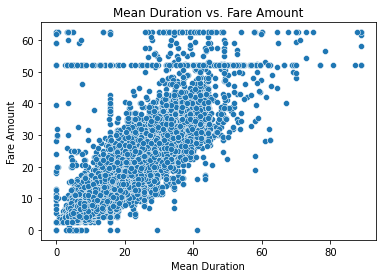

In [30]:
# Create a scatterplot to visualize the relationship between variables of interest

fig = sns.scatterplot(data=df0, x='mean_duration', y='fare_amount')
fig.set_xlabel("Mean Duration")
fig.set_ylabel("Fare Amount")
fig.set_title("Mean Duration vs. Fare Amount")
plt.show()



The `mean_duration` variable correlates with the target variable. But what are the horizontal lines around fare amounts of 52 dollars and 63 dollars? What are the values and how many are there?

You know what one of the lines represents. 62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of \$62.50. What is the other line?

Check the value of the rides in the second horizontal line in the scatter plot.

In [31]:
print(df0[df0['fare_amount'] > 50]['fare_amount'].mode())
print('\n')

print(df0[df0['fare_amount'] > 50]['fare_amount'].value_counts().head())

0    52.0
dtype: float64


52.0    514
62.5     84
59.0      9
50.5      9
57.5      8
Name: fare_amount, dtype: int64


Examine the first 30 of these trips.

In [32]:
# Set pandas to display all columns

pd.set_option('display.max_columns', None)
df0[df0['fare_amount'] == 52].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,duration,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour,day_num
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,36.800000,2,18.90,2,N,236,132,1,52.0,0.0,0.5,14.58,5.54,0.3,72.92,236 132,19.211667,40.500000,Sunday,March,0,7
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,66.850000,1,18.00,2,N,132,163,1,52.0,0.0,0.5,0.00,0.00,0.3,52.80,132 163,19.229000,52.941667,Saturday,June,0,6
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,0.966667,1,0.23,2,N,132,132,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,132 132,2.255862,3.021839,Saturday,November,0,6
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,29.183333,1,18.93,2,N,132,79,2,52.0,0.0,0.5,0.00,0.00,0.3,52.80,132 79,19.431667,47.275000,Wednesday,December,0,3
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,29.483333,1,17.99,2,N,132,234,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,132 234,17.654000,49.833333,Sunday,September,0,7
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,39.833333,1,18.40,2,N,132,48,2,52.0,4.5,0.5,0.00,5.54,0.3,62.84,132 48,18.761905,58.246032,Tuesday,February,1,2
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,15.616667,1,4.73,2,N,228,88,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,228 88,4.730000,15.616667,Monday,June,0,1
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,45.450000,2,18.21,2,N,132,48,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,132 48,18.761905,58.246032,Thursday,August,0,4
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,42.850000,1,17.27,2,N,186,132,2,52.0,0.0,0.5,0.00,5.76,0.3,58.56,186 132,17.096000,42.920000,Tuesday,September,0,2
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,71.583333,6,18.34,2,N,132,148,1,52.0,0.0,0.5,5.00,0.00,0.3,57.80,132 148,17.994286,46.340476,Sunday,April,0,7


**Question:** What do you notice about the first 30 trips?

RatecodeID is 2 for all 30 trips and most of these trips begin and/or end at station 132.

RatecodeID 2 is for trips to JFK airport. There was a flat rate of $52 for trips from Manhattan to JFK in 2017, so this makes sense.

### Task 5. Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [33]:
df1 = df0[['VendorID','passenger_count','fare_amount','mean_distance','mean_duration','rush_hour']]

df1.head()

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
0,2,6,13.0,3.521667,22.847222,0
1,1,1,16.0,3.108889,24.470370,0
2,1,1,6.5,0.881429,7.250000,1
3,2,1,20.5,3.700000,30.250000,0
4,2,1,16.5,4.435000,14.616667,0


In [34]:
df1['rush_hour'] = df1['rush_hour'].astype('int')

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


### Task 6. Pair plot

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

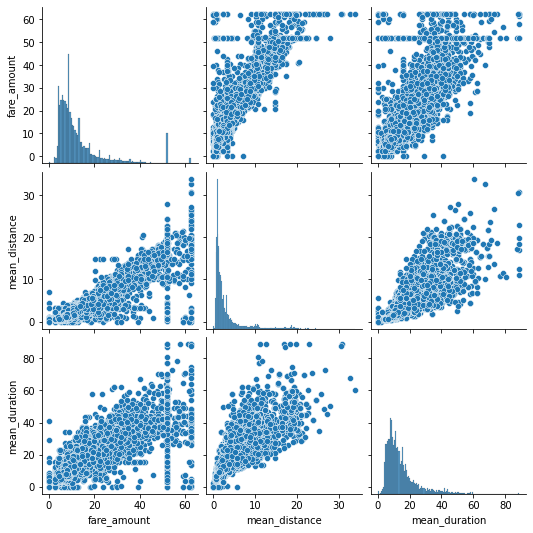

In [35]:
# Create a pairplot to visualize pairwise relationships between variables in the data

sns.pairplot(df1, vars = df1.columns[2:5]);

These variables all show linear correlation with each other. Investigate this further.

### Task 7. Identify correlations

Next, code a correlation matrix to help determine most correlated variables.

In [36]:
# Correlation matrix to help determine most correlated variables
df1.corr()

,VendorID,passenger_count,fare_amount,mean_distance,mean_duration,rush_hour
VendorID,1.000000,0.266463,0.001045,0.004741,0.001876,-0.002701
passenger_count,0.266463,1.000000,0.014942,0.013428,0.015852,-0.021755
fare_amount,0.001045,0.014942,1.000000,0.910185,0.859105,-0.020173
mean_distance,0.004741,0.013428,0.910185,1.000000,0.874864,-0.039836
mean_duration,0.001876,0.015852,0.859105,0.874864,1.000000,-0.021720
rush_hour,-0.002701,-0.021755,-0.020173,-0.039836,-0.021720,1.000000


Visualize a correlation heatmap of the data.

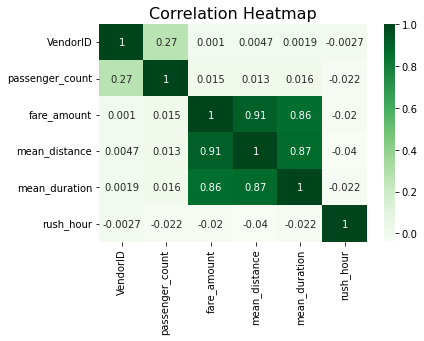

In [37]:
# Create correlation heatmap

ax = sns.heatmap(df1.corr(), annot=True, cmap = 'Greens')
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

**Question:** Which variable(s) are correlated with the target variable of `fare_amount`? mean_distance and mean_duration. They are also highly correlated with each other.

Highly correlated predictor variables can be bad for linear regression models when you want to be able to draw statistical inferences about the data from the model. However, correlated predictor variables can still be used to create an accurate predictor if the prediction itself is more important than using the model as a tool to learn about your data.

Try modeling with both variables even though they are correlated.

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.


### Task 8a. Split data into outcome variable and features

In [38]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   VendorID         22699 non-null  int64  
 1   passenger_count  22699 non-null  int64  
 2   fare_amount      22699 non-null  float64
 3   mean_distance    22699 non-null  float64
 4   mean_duration    22699 non-null  float64
 5   rush_hour        22699 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 1.0 MB


Set your X and y variables. X represents the features and y represents the outcome (target) variable.

In [39]:
# Remove the target column from the features
# X = df2.drop(columns='fare_amount')
X = df1.drop(columns = 'fare_amount')

# Set y variable
y = df1[['fare_amount']]

# Display first few rows
print(X.head())
y.head()

   VendorID  passenger_count  mean_distance  mean_duration  rush_hour
0         2                6       3.521667      22.847222          0
1         1                1       3.108889      24.470370          0
2         1                1       0.881429       7.250000          1
3         2                1       3.700000      30.250000          0
4         2                1       4.435000      14.616667          0


,fare_amount
0,13.0
1,16.0
2,6.5
3,20.5
4,16.5


### Task 8b. Pre-process data


Dummy encode categorical variables

In [40]:
# Convert VendorID to string
X['VendorID'] = X['VendorID'].astype('str')

# Get dummies
X = pd.get_dummies(X, drop_first=True)
X.head()

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,6,3.521667,22.847222,0,1
1,1,3.108889,24.470370,0,0
2,1,0.881429,7.250000,1,0
3,1,3.700000,30.250000,0,1
4,1,4.435000,14.616667,0,1


### Split data into training and test sets

Create training and testing sets. The test set should contain 20% of the total samples. Set `random_state=0`.

In [41]:
# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [42]:
# Manually built regression formula
ols_formula = "fare_amount ~ passenger_count + mean_distance + mean_duration + rush_hour + VendorID_2"

ols_data = pd.concat([X_train, y_train], axis = 1)

OLS = ols(formula = ols_formula, data = ols_data)

model = OLS.fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                 1.904e+04
Date:                Fri, 13 Oct 2023   Prob (F-statistic):               0.00
Time:                        14:40:47   Log-Likelihood:                -51954.
No. Observations:               18159   AIC:                         1.039e+05
Df Residuals:                   18153   BIC:                         1.040e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.0106      0.080     37.455      0.000       2.853       3.168
passenger_count     0.0239      0.025      0.945      0.345      -0.026       0.073
mean_distance       1.9957      0.018    110.287      0.000       1.960       2.031
mean_duration       0.2784      0.006     43.499      0.000       0.266       0.291
rush_hour           0.2420      0.069      3.515      0.000       0.107       0.377
VendorID_2         -0.1094      0.066     -1.669      0.095      -0.238       0.019
==============================================================================
Omnibus:                    21369.245   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3406385.640
Skew:                           6.142   Prob(JB):                         0.00
Kurtosis:                      68.964   Cond. No.                         51.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [121]:
from sklearn.feature_selection import RFE 
from sklearn.svm import SVR 

# Backwards elimination variable selection
estimator = SVR(kernel="linear")
selector = RFE(estimator, step=1)
selector = selector.fit(X_train, y_train)
X_train_selector = selector.transform(X_train)

print('coefficients', selector.estimator_.coef_)
print('\n')
coefficients = pd.DataFrame(selector.estimator_.coef_)
print(coefficients)
print('\n')
selected_feat= X.columns[(selector.get_support())]
print("Selected Variables: ",selected_feat)
print('\n')
print(selector.support_)
print('\n')
print(selector.ranking_)
print('\n')

estimator.fit(X_train_selector, y_train)

y_pred_train = estimator.predict(X_train_selector)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

coefficients [[1.97394892 0.31560122]]


          0         1
0  1.973949  0.315601


Selected Variables:  Index(['mean_distance', 'mean_duration'], dtype='object')


[False  True  True False False]


[4 1 1 2 3]


R^2: 0.8370652472056802
MAE: 2.1217503323129865
MSE: 18.200063455070055
RMSE: 4.2661532385827465


In [122]:
# Compare backwards elimination selection model performance when using scaled X data

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

# Backwards elimination variable selection
estimator = SVR(kernel="linear")
selector = RFE(estimator, step=1)
selector = selector.fit(X_train_scaled, y_train)
X_train_scaled_selector = selector.transform(X_train_scaled)

print('coefficients', selector.estimator_.coef_)
print('\n')
coefficients = pd.DataFrame(selector.estimator_.coef_)
print(coefficients)
print('\n')
selected_feat= X.columns[(selector.get_support())]
print("Selected Variables: ",selected_feat)
print('\n')
print(selector.support_)
print('\n')
print(selector.ranking_)
print('\n')

estimator.fit(X_train_scaled_selector, y_train)

y_pred_train = estimator.predict(X_train_scaled_selector)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('\n')
print("Performance with scaled X data is slightly better than with non-scaled X data (R^2 0.83707 vs. 0.83706 with non-scaled X data; MSE and RMSE also slightly lower w/ scaled X data). Same X-variables were selected with the scaled data.")

coefficients [[7.04989275 3.19049352]]


          0         1
0  7.049893  3.190494


Selected Variables:  Index(['mean_distance', 'mean_duration'], dtype='object')


[False  True  True False False]


[4 1 1 2 3]


R^2: 0.8370723883743152
MAE: 2.1217596963913645
MSE: 18.199265775507705
RMSE: 4.266059748234629


Performance with scaled X data is slightly better than with non-scaled X data (R^2 0.83707 vs. 0.83706 with non-scaled X data; MSE and RMSE also slightly lower w/ scaled X data). Same X-variables were selected with the scaled data.


In [44]:
# .837 AT 3, .837 at 2, .817 at 1, .837 at 4, .837 at 5

In [126]:
# Evaluate backwards elimination selection model performance on test data

scaler = StandardScaler().fit(X_test)
X_test_scaled = scaler.transform(X_test)

# Backwards elimination variable selection
estimator = SVR(kernel="linear")
selector = RFE(estimator, step=1)
selector = selector.fit(X_train_scaled, y_train)
X_test_scaled_selector = selector.transform(X_test_scaled)

print('coefficients', selector.estimator_.coef_)
print('\n')
coefficients = pd.DataFrame(selector.estimator_.coef_)
print(coefficients)
print('\n')
selected_feat= X.columns[(selector.get_support())]
print("Selected Variables: ",selected_feat)
print('\n')
print(selector.support_)
print('\n')
print(selector.ranking_)
print('\n')

estimator.fit(X_test_scaled_selector, y_test)

y_pred_test = estimator.predict(X_test_scaled_selector)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test, y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('\n')
print("Performance on test data is better than on training data (R^2 0.86626 vs. 0.83707 with training data; MAE, MSE, and RMSE also slightly lower w/ test data).")




coefficients [[7.04989275 3.19049352]]


          0         1
0  7.049893  3.190494


Selected Variables:  Index(['mean_distance', 'mean_duration'], dtype='object')


[False  True  True False False]


[4 1 1 2 3]


R^2: 0.8662603440843675
MAE: 2.061016819773578
MSE: 14.543732036691747
RMSE: 3.813624527492415


Performance on test data is better than on training data (R^2 0.86626 vs. 0.83707 with training data; MAE, MSE, and RMSE also slightly lower w/ test data).


In [102]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

clf = LinearRegression()

# Build step forward feature selection
sfs1 = sfs(clf,k_features = "best",forward=True,floating=False, scoring='r2',cv=5)

# Perform SFFS
sfs1 = sfs1.fit(X_train, y_train)
results = pd.DataFrame.from_dict(sfs1.get_metric_dict()).T
display(results)
print('\n')

print("Selected Variables: ",sfs1.k_feature_names_)

X_train_sfs = sfs1.transform(X_train)
X_test_sfs = sfs1.transform(X_test)

clf.fit(X_train_sfs, y_train)

y_pred_train = clf.predict(X_train_sfs)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1,)","[0.8149217866987708, 0.8381164551771357, 0.811...",0.822402,"(mean_distance,)",0.011983,0.009323,0.004662
2,"(1, 2)","[0.8311731250117018, 0.8558238584649502, 0.826...",0.839247,"(mean_distance, mean_duration)",0.013025,0.010134,0.005067
3,"(1, 2, 3)","[0.8312787262232197, 0.8560124326625455, 0.826...",0.839348,"(mean_distance, mean_duration, rush_hour)",0.013035,0.010142,0.005071
4,"(1, 2, 3, 4)","[0.8313031742348237, 0.8560622283317788, 0.826...",0.839361,"(mean_distance, mean_duration, rush_hour, Vend...",0.013051,0.010154,0.005077
5,"(0, 1, 2, 3, 4)","[0.8312769011506808, 0.8560827035063188, 0.826...",0.83936,"(passenger_count, mean_distance, mean_duration...",0.013073,0.010171,0.005086




Selected Variables:  ('mean_distance', 'mean_duration', 'rush_hour', 'VendorID_2')
R^2: 0.8398361316375565
MAE: 2.1866469058705005
MSE: 17.89055138584026
RMSE: 4.229722376922658


In [105]:
# Compare forward selection model performance when using scaled X data

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

# Perform SFFS
sfs1_scaled = sfs1.fit(X_train_scaled, y_train)
results = pd.DataFrame.from_dict(sfs1.get_metric_dict()).T
display(results)
print('\n')

print("Selected Variables: ", sfs1_scaled.k_feature_names_)

X_train_scaled_sfs = sfs1_scaled.transform(X_train_scaled)

clf.fit(X_train_scaled_sfs, y_train)

y_pred_train = clf.predict(X_train_scaled_sfs)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))
print('\n')
print("Performance between scaled and non-scaled X train data with forward selection model is the same. Same X-variables were selected with the scaled data.")

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(1,)","[0.8149217866987708, 0.8381164551771357, 0.811...",0.822402,"(1,)",0.011983,0.009323,0.004662
2,"(1, 2)","[0.8311731250117018, 0.8558238584649502, 0.826...",0.839247,"(1, 2)",0.013025,0.010134,0.005067
3,"(1, 2, 3)","[0.8312787262232197, 0.8560124326625455, 0.826...",0.839348,"(1, 2, 3)",0.013035,0.010142,0.005071
4,"(1, 2, 3, 4)","[0.8313031742348237, 0.8560622283317788, 0.826...",0.839361,"(1, 2, 3, 4)",0.013051,0.010154,0.005077
5,"(0, 1, 2, 3, 4)","[0.8312769011506808, 0.8560827035063188, 0.826...",0.83936,"(0, 1, 2, 3, 4)",0.013073,0.010171,0.005086




Selected Variables:  ('1', '2', '3', '4')
R^2: 0.8398361316375565
MAE: 2.1866469058705005
MSE: 17.89055138584026
RMSE: 4.229722376922658


Performance between scaled and non-scaled X train data with forward selection model is the same. Same X-variables were selected with the scaled data.


In [137]:
# Evaluate forward selection model performance on test data

X_test_scaled = scaler.transform(X_test)

X_test_scaled_sfs = sfs1_scaled.transform(X_test_scaled)

clf.fit(X_test_scaled_sfs, y_test)

y_pred_test = clf.predict(X_test_scaled_sfs)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test, y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('\n')
print('The forward selection model performed slightly better on the test data than the below model which fit all X variables (R^2 0.8688 vs. 0.8682 for the model below; all error calculations slightly lower for forward selection model as well).')


R^2: 0.8688363773190362
MAE: 2.112505677861621
MSE: 14.26359719690818
RMSE: 3.776717780945272


The forward selection model performed slightly better on the test data than the below model which fit all X variables (R^2 0.8688 vs. 0.8682 for the model below; all error calculations slightly lower for forward selection model as well).


### Standardize the data

Use `StandardScaler()`, `fit()`, and `transform()` to standardize the `X_train` variables. Assign the results to a variable called `X_train_scaled`.

In [130]:
# Standardize the X variables
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
print('X_train scaled:', X_train_scaled)

X_train scaled: [[-0.50301524  0.8694684   0.17616665 -0.64901898  0.89286563]
 [-0.50301524 -0.60011281 -0.69829589  1.54078698  0.89286563]
 [ 0.27331093 -0.47829156 -0.57301906 -0.64901898 -1.11998936]
 ...
 [-0.50301524 -0.45121122 -0.6788917  -0.64901898 -1.11998936]
 [-0.50301524 -0.58944763 -0.85743597  1.54078698 -1.11998936]
 [ 1.82596329  0.83673851  1.13212101 -0.64901898  0.89286563]]


### Fit the model

Instantiate your model and fit it to the training data.

In [138]:
# Fit your model to the training data
lr=LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Task 8c. Evaluate model

### Train data

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [139]:
# Evaluate the model performance on the training data
r_sq = lr.score(X_train_scaled, y_train)
print('Coefficient of determination:', r_sq)
y_pred_train = lr.predict(X_train_scaled)
print('R^2:', r2_score(y_train, y_pred_train))
print('MAE:', mean_absolute_error(y_train, y_pred_train))
print('MSE:', mean_squared_error(y_train, y_pred_train))
print('RMSE:',np.sqrt(mean_squared_error(y_train, y_pred_train)))

Coefficient of determination: 0.8398440077396567
R^2: 0.8398440077396567
MAE: 2.1866452112891586
MSE: 17.889671613075134
RMSE: 4.229618376765821


### Test data

Calculate the same metrics on the test data. Remember to scale the `X_test` data using the scaler that was fit to the training data. Do not refit the scaler to the testing data, just transform it. Call the results `X_test_scaled`.

In [140]:
# Scale the X_test data
X_test_scaled = scaler.transform(X_test)

In [165]:
# Evaluate the model performance on the testing data
r_sq_test = lr.score(X_test_scaled, y_test)
print('Coefficient of determination:', r_sq_test)
y_pred_test = lr.predict(X_test_scaled)
print('R^2:', r2_score(y_test, y_pred_test))
print('MAE:', mean_absolute_error(y_test,y_pred_test))
print('MSE:', mean_squared_error(y_test, y_pred_test))
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred_test)))

Coefficient of determination: 0.8682582506782588
R^2: 0.8682582506782588
MAE: 2.133701249389858
MSE: 14.326466499877256
RMSE: 3.785031902095048


<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### Task 9a. Results

Use the code cell below to get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [142]:
# Create a `results` dataframe
results = pd.DataFrame(data={'actual': y_test['fare_amount'],
                             'predicted': y_pred_test.ravel()})
results['residual'] = results['actual'] - results['predicted']
results.head()

,actual,predicted,residual
5818,14.0,12.356335,1.643665
18134,28.0,16.314422,11.685578
4655,5.5,6.726580,-1.226580
7378,15.5,16.227049,-0.727049
13914,9.5,10.536201,-1.036201


### Task 9b. Visualize model results

Create a scatterplot to visualize `actual` vs. `predicted`.

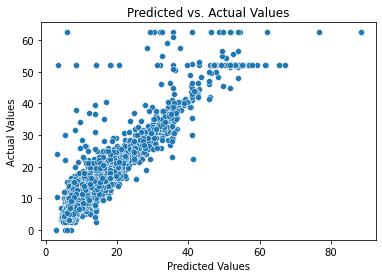

In [143]:
# Create a scatterplot to visualize `predicted` over `actual`

fig = sns.scatterplot(data=results, x = 'predicted', y = 'actual')
fig.set_xlabel("Predicted Values")
fig.set_ylabel("Actual Values")
fig.set_title("Predicted vs. Actual Values")
plt.show()

Visualize the distribution of the `residuals` using a histogram.

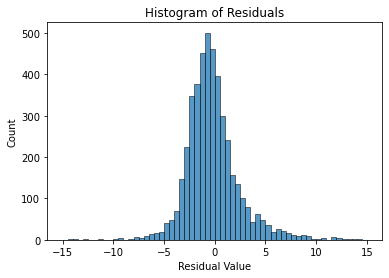

In [144]:
# Visualize the distribution of the `residuals`
fig = sns.histplot(results['residual'], binrange=(-15, 15), binwidth=0.5)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()



In [145]:
# Calculate residual mean
results['residual'].mean()

-0.015484657592606489

Create a scatterplot of `residuals` over `predicted`.

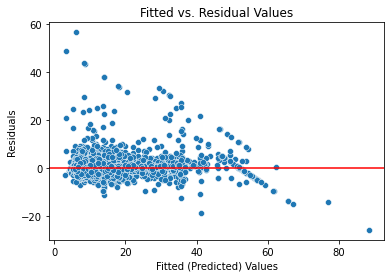

In [146]:
# Create a scatterplot of `residuals` over `predicted`
fig = sns.scatterplot(data=results, x = 'predicted', y = 'residual')
fig.axhline(0,color='r')
fig.set_xlabel("Fitted (Predicted) Values")
fig.set_ylabel("Residuals")
fig.set_title("Fitted vs. Residual Values")
plt.show()

### Task 9c. Coefficients

Use the `coef_` attribute to get the model's coefficients. The coefficients are output in the order of the features that were used to train the model. Which feature had the greatest effect on trip fare?

In [147]:
# Output the model's coefficients
coefficients = pd.DataFrame(lr.coef_, columns=X.columns)
coefficients

,passenger_count,mean_distance,mean_duration,rush_hour,VendorID_2
0,0.030785,7.133896,2.812104,0.110511,-0.054373


What do these coefficients mean? How should they be interpreted?

The coefficients reveal that mean_distance was the feature with the greatest weight in the model's final prediction. Be careful here! A common misinterpretation is that for every mile traveled, the fare amount increases by a mean of $7.13. This is incorrect. Remember, the data used to train the model was standardized with StandardScaler(). As such, the units are no longer miles. In other words, you cannot say "for every mile traveled...", as stated above. The correct interpretation of this coefficient is: controlling for other variables, for every +1 change in standard deviation, the fare amount increases by a mean of $7.13.

Note also that because some highly correlated features were not removed, the confidence interval of this assessment is wider.

So, translate this back to miles instead of standard deviation (i.e., unscale the data).

    Calculate the standard deviation of mean_distance in the X_train data.

    Divide the coefficient (7.133867) by the result to yield a more intuitive interpretation.

In [158]:
# 1. Calculate SD of `mean_distance` in X_train data
print(X_train['mean_distance'].std())

# 2. Divide the model coefficient by the standard deviation
print("Mean Distance Unscaled Coef: ",7.133867 / X_train['mean_distance'].std())
print('\n')

print(X_train['mean_duration'].std())
print("Mean Duration Unscaled Coef: ",2.812104 / X_train['mean_duration'].std())
print('\n')

print(X_train['rush_hour'].std())
print("Rush Hour Unscaled Coef: ",0.110511 / X_train['rush_hour'].std())
print('\n')

print(X_train['VendorID_2'].std())
print("VendorID_2 Unscaled Coef: ",-0.054373 / X_train['VendorID_2'].std())
print('\n')

print(X_train['passenger_count'].std())
print("Passenger Count Unscaled Coef: ",0.030785 / X_train['passenger_count'].std())
print('\n')

print("Now this can be interpreted more intuitively: For example, for every 3.57 miles traveled, the fare increased by a mean of $7.13. Or, reduced: for every 1 mile traveled, the fare increased by a mean of $2.00.")

3.574812975256415
Mean Distance Unscaled Coef:  1.9955916713344426


10.100132624321162
Mean Duration Unscaled Coef:  0.2784224826145789


0.45667403939089296
Rush Hour Unscaled Coef:  0.24199098365082983


0.49682045811752745
VendorID_2 Unscaled Coef:  -0.10944195053082449


1.2881538235053889
Passenger Count Unscaled Coef:  0.023898543355813137


Now this can be interpreted more intuitively: For example, for every 3.57 miles traveled, the fare increased by a mean of $7.13. Or, reduced: for every 1 mile traveled, the fare increased by a mean of $2.00.


### Task 9d. Conclusion

1. What are the key takeaways from this notebook?



2. What results can be presented from this notebook?





NOTES

This notebook was designed for teaching purposes. As such, there are some things to note that differ from best practice or from how tasks are typically performed.

   When the mean_distance and mean_duration columns were computed, the means were calculated from the entire dataset. These same columns were then used to train a model that was used to predict on a test set. A test set is supposed to represent entirely new data that the model has not seen before, but in this case, some of its predictor variables were derived using data that was in the test set. This is known as data leakage. Data leakage is when information from your training data contaminates the test data. If your model has unexpectedly high scores, there is a good chance that there was some data leakage. To avoid data leakage in this modeling process, it would be best to compute the means using only the training set and then copy those into the test set, thus preventing values from the test set from being included in the computation of the means. This would have created some problems because it's very likely that some combinations of pickup-dropoff locations would only appear in the test data (not the train data). This means that there would be NaNs in the test data, and further steps would be required to address this. In this case, the data leakage improved the R2 score by ~0.03.
    Imputing the fare amount for RatecodeID 2 after training the model and then calculating model performance metrics on the post-imputed data is not best practice. It would be better to separate the rides that did not have rate codes of 2, train the model on that data specifically, and then add the RatecodeID 2 data (and its imputed rates) after. This would prevent training the model on data that you don't need a model for, and would likely result in a better final model. However, the steps were combined for simplicity.
    Models that predict values to be used in another downstream model are common in data science workflows. When models are deployed, the data cleaning, imputations, splits, predictions, etc. are done using modeling pipelines. Pandas was used here to granularize and explain the concepts of certain steps, but this process would be streamlined by machine learning engineers. The ideas are the same, but the implementation would differ. Once a modeling workflow has been validated, the entire process can be automated, often with no need for pandas and no need to examine outputs at each step. This entire process would be reduced to a page of code.


In [161]:
# Additional steps to prepare model for next steps


     #   Get the model's predictions on the full dataset.
X_scaled = scaler.transform(X)
y_preds_full = lr.predict(X_scaled)


     #   Impute the constant fare rate of $52 for all trips with rate codes of 2.
# Create a new df containing just the RatecodeID col from the whole dataset
final_preds = df0[['RatecodeID']].copy()

# Add a column containing all the predictions
final_preds['y_preds_full'] = y_preds_full

# Impute a prediction of 52 at all rows where RatecodeID == 2
final_preds.loc[final_preds['RatecodeID']==2, 'y_preds_full'] = 52

# Check that it worked
display(final_preds[final_preds['RatecodeID']==2].head())
print('\n')


     #   Check the model's performance on the full dataset.
final_preds = final_preds['y_preds_full']
print('R^2:', r2_score(y, final_preds))
print('MAE:', mean_absolute_error(y, final_preds))
print('MSE:', mean_squared_error(y, final_preds))
print('RMSE:',np.sqrt(mean_squared_error(y, final_preds)))
print('\n')


     #   Save the final predictions and mean_duration and mean_distance columns for downstream use.
# Combine means columns with predictions column
nyc_preds_means = df1[['mean_duration', 'mean_distance']].copy()
nyc_preds_means['predicted_fare'] = final_preds

display(nyc_preds_means.head())

,RatecodeID,y_preds_full
11,2,52.0
110,2,52.0
161,2,52.0
247,2,52.0
379,2,52.0




R^2: 0.8910859646995409
MAE: 1.9924975246449375
MSE: 12.101512523696142
RMSE: 3.4787228293866908




,mean_duration,mean_distance,predicted_fare
0,22.847222,3.521667,16.433919
1,24.470370,3.108889,16.052038
2,7.250000,0.881429,7.054122
3,30.250000,3.700000,18.731470
4,14.616667,4.435000,15.845485


**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged. 